# Compare metrics of experiments

In [93]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
DATASET_PATH = os.path.join(BASE_PATH, "datasets")

In [96]:
sys.path.append(MODULES_PATH)

In [97]:
%autoreload 2
from active_learning import Metrics
from utils import MetricsTransformer

### Compare mc dropout runtime for different settings

Following parameter setting were used

| Parameter | Value 
| --- | ---
| Train epochs | 100
| Optimizer | adadelta
| loss | sparse_cross_entropy
| Step size | 1
| acquisition function | Max. Entropy

In [98]:
%autoreload 2
metrics_handler = Metrics(os.path.join(METRICS_PATH, "comparison"))
metrics_transformer = MetricsTransformer()
dtypes = {"time": float, "accuracy": float, "loss": float, "labeled_size": int}
mc_dp_mxe_1 = metrics_transformer.load("1_mc_dropout_max_entropy", metrics_handler, dtype=dtypes)
mc_dp_mxe_2 = metrics_transformer.load("2_mc_dropout_max_entropy", metrics_handler, dtype=dtypes)
mc_dp_mxe_3 = metrics_transformer.load("3_mc_dropout_max_entropy", metrics_handler, dtype=dtypes)

In [99]:
mc_dp_mxe_1.insert(1, "sample_size", 100)
mc_dp_mxe_2.insert(1, "sample_size", 10)
mc_dp_mxe_3.insert(1, "sample_size", 5)

In [100]:
mc_dp_df = pd.concat([mc_dp_mxe_1, mc_dp_mxe_2, mc_dp_mxe_3])

In [101]:
mc_dp_df["time"] = mc_dp_df["time"]/60

Text(0, 0.5, 'Loop iteration in minutes')

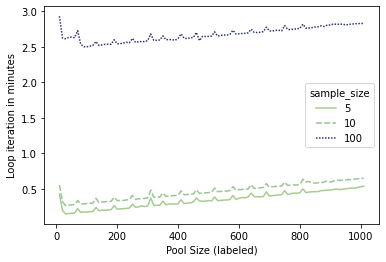

In [102]:
sns.color_palette("mako", as_cmap=True)
sns.lineplot(data=mc_dp_df, x="labeled_size", y="time", hue="sample_size", palette="crest", style="sample_size")
plt.xlabel("Pool Size (labeled)")
plt.ylabel("Loop iteration in minutes")

In [128]:
mc_dp_df.head()

,iteration,sample_size,labeled_size,time,loss,accuracy
0,0,100,10,2.930344,4.892703,0.120977
1,1,100,20,2.624253,4.042689,0.116252
2,2,100,30,2.613050,3.883864,0.119997
3,3,100,40,2.630950,3.755081,0.125250
4,4,100,50,2.636910,3.552625,0.129317


Text(0, 0.5, 'Accuracy')

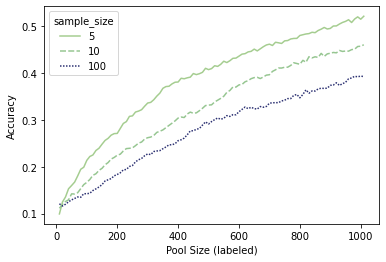

In [103]:
sns.lineplot(data=mc_dp_df, x="labeled_size", y="accuracy", hue="sample_size", palette="crest", style="sample_size")
plt.xlabel("Pool Size (labeled)")
plt.ylabel("Accuracy")

## Compare runtime and performance to moment propagation

In [104]:
%autoreload 2
mp_mxe_1 = metrics_transformer.load("1_moment_propagation_max_entropy", metrics_handler, dtype=dtypes)
mc_dp_mxe_1 = metrics_transformer.load("1_mc_dropout_max_entropy", metrics_handler, dtype=dtypes)
mc_dp_mxe_2 = metrics_transformer.load("2_mc_dropout_max_entropy", metrics_handler, dtype=dtypes)
mc_dp_mxe_3 = metrics_transformer.load("3_mc_dropout_max_entropy", metrics_handler, dtype=dtypes)

In [105]:
mc_dp_mxe_1.insert(1, "model", "MC Dropout (s=100)")
mc_dp_mxe_2.insert(1, "model", "MC Dropout (s=10)")
mc_dp_mxe_3.insert(1, "model", "MC Dropout (s=5)")
mp_mxe_1.insert(1, "model", "Moment Propagation")

In [106]:
mp_dp_1 = pd.concat([mc_dp_mxe_1, mc_dp_mxe_2, mc_dp_mxe_3, mp_mxe_1], sort=False)

In [120]:
mp_dp_1["time"] = mp_dp_1["time"]/60

In [121]:
mp_dp_1.head()

,iteration,model,labeled_size,time,loss,accuracy
0,0,MC Dropout (s=100),10,2.930344,4.892703,0.120977
1,1,MC Dropout (s=100),20,2.624253,4.042689,0.116252
2,2,MC Dropout (s=100),30,2.613050,3.883864,0.119997
3,3,MC Dropout (s=100),40,2.630950,3.755081,0.125250
4,4,MC Dropout (s=100),50,2.636910,3.552625,0.129317


Text(0, 0.5, 'Loss')

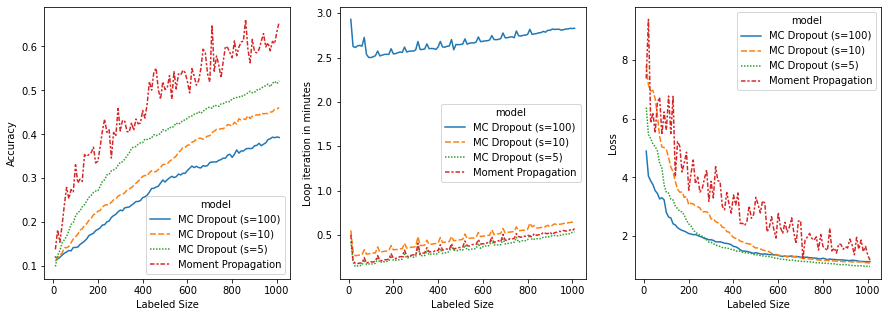

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.lineplot(ax=axes[0], data=mp_dp_1, y="accuracy", x="labeled_size", hue="model", style="model")
axes[0].set_xlabel("Labeled Size")
axes[0].set_ylabel("Accuracy")

sns.lineplot(ax=axes[1], data=mp_dp_1, y="time", x="labeled_size", hue="model", style="model")
axes[1].set_xlabel("Labeled Size")
axes[1].set_ylabel("Loop iteration in minutes")

sns.lineplot(ax=axes[2], data=mp_dp_1, y="loss", x="labeled_size", hue="model", style="model")
axes[2].set_xlabel("Labeled Size")
axes[2].set_ylabel("Loss")